In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows',40000)
pd.set_option('display.max_columns',2200)

In [2]:
df=pd.DataFrame([])

nome_meses=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for y in range (4,10):  # 4 de 201'4' e 10 significa que vai até o 9 de 201'9'
    for m in nome_meses:
        c=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\201{}\201{}{}.xlsx'.format(y,y,m))
        df=df.append(c)
df.set_index('Unnamed: 0',inplace=True)
B=pd.date_range(start='2014-01-01 00:00:00', end='2019-12-31 23:50:00', freq='10min')
df.index=B ## Para utilizar o index em outro conjunto de dados que criarmos

In [3]:
df

,SolarRad,Rain,TempOut,FilledData
2014-01-01 00:00:00,0.0,0.0,26300.0,Lavat
2014-01-01 00:10:00,0.0,0.0,26200.0,Lavat
2014-01-01 00:20:00,0.0,0.0,26200.0,Lavat
2014-01-01 00:30:00,0.0,0.0,26100.0,Lavat
2014-01-01 00:40:00,0.0,0.0,26200.0,Lavat
...,...,...,...,...
2019-12-31 23:10:00,0.0,0.0,27100.0,Lavat
2019-12-31 23:20:00,0.0,0.0,27000.0,Lavat
2019-12-31 23:30:00,0.0,0.0,27100.0,Lavat
2019-12-31 23:40:00,NaN,NaN,NaN,Faltante


In [4]:
df.shape

(315504, 4)

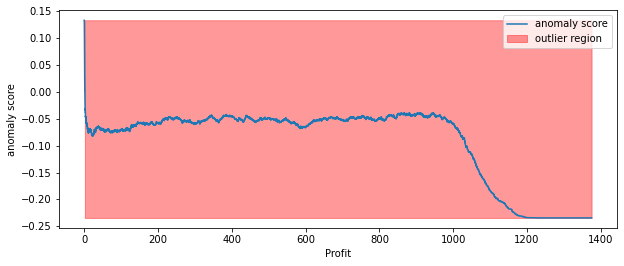

In [13]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df.SolarRad.dropna().values.reshape(-1, 1))
xx = np.linspace(df.SolarRad.dropna().min(), df.SolarRad.dropna().max(), len(df.SolarRad.dropna())).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

2014-01-01 00:00:00    0.0
2014-01-01 00:10:00    0.0
2014-01-01 00:20:00    0.0
2014-01-01 00:30:00    0.0
2014-01-01 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    NaN
2019-12-31 23:50:00    0.0
Freq: 10T, Name: SolarRad, Length: 315504, dtype: float64

In [3]:
df.SolarRad.loc[df.index.strftime('%Y-%m  %H:%M')=='2014-01  06:10']

2014-01-01 06:10:00     95.0
2014-01-02 06:10:00    146.0
2014-01-03 06:10:00     62.0
2014-01-04 06:10:00    112.0
2014-01-05 06:10:00     60.0
2014-01-06 06:10:00    131.0
2014-01-07 06:10:00     89.0
2014-01-08 06:10:00     64.0
2014-01-09 06:10:00    126.0
2014-01-10 06:10:00    117.0
2014-01-11 06:10:00    139.0
2014-01-12 06:10:00    103.0
2014-01-13 06:10:00    113.0
2014-01-14 06:10:00     43.0
2014-01-15 06:10:00      NaN
2014-01-16 06:10:00     85.0
2014-01-17 06:10:00     47.0
2014-01-18 06:10:00     91.0
2014-01-19 06:10:00     66.0
2014-01-20 06:10:00    106.0
2014-01-21 06:10:00     67.0
2014-01-22 06:10:00     89.0
2014-01-23 06:10:00     70.0
2014-01-24 06:10:00     59.0
2014-01-25 06:10:00     93.0
2014-01-26 06:10:00     40.0
2014-01-27 06:10:00     71.0
2014-01-28 06:10:00    104.0
2014-01-29 06:10:00     43.0
2014-01-30 06:10:00      6.0
2014-01-31 06:10:00     98.0
Freq: 1440T, Name: SolarRad, dtype: float64

In [4]:
(df.SolarRad.loc[df.index.strftime('%Y-%m  %H:%M')=='2014-01  06:10']).mean()

84.5

In [5]:
df.SolarRad.loc[df.index.strftime('%Y-%m  %H:%M')=='2014-01  06:10'].sum()

2535.0

In [6]:
df.loc['2016-01'].loc[(df.Rain>0)]

,SolarRad,Rain,TempOut,FilledData
2016-01-02 08:40:00,289.0,0.2,28100.0,Lavat
2016-01-02 10:10:00,108.0,0.4,27300.0,Lavat
2016-01-02 10:20:00,147.0,24000.0,26400.0,Lavat
2016-01-02 10:30:00,176.0,0.2,26200.0,Lavat
2016-01-06 05:10:00,1.0,0.4,26700.0,Lavat
2016-01-08 00:20:00,0.0,0.2,26500.0,Lavat
2016-01-08 01:20:00,0.0,0.2,26200.0,Lavat
2016-01-08 01:30:00,0.0,0.4,25800.0,Lavat
2016-01-08 02:10:00,0.0,32000.0,25400.0,Lavat
2016-01-08 02:20:00,0.0,0.2,25100.0,Lavat


In [7]:
df.loc['2015-01'].loc[(df.Rain>0)]

,SolarRad,Rain,TempOut,FilledData
2015-01-02 18:10:00,0.0,0.4,24300.0,Lavat
2015-01-10 06:20:00,60.0,0.4,24100.0,Lavat
2015-01-10 19:20:00,0.0,0.8,26800.0,Lavat
2015-01-10 19:30:00,0.0,0.2,25600.0,Lavat
2015-01-10 19:40:00,0.0,0.8,25100.0,Lavat
2015-01-10 19:50:00,0.0,0.6,24700.0,Lavat
2015-01-10 20:00:00,0.0,0.2,24600.0,Lavat
2015-01-10 20:10:00,0.0,0.2,25100.0,Lavat
2015-01-10 22:40:00,0.0,34000.0,24900.0,Lavat
2015-01-10 22:50:00,0.0,10000.0,24300.0,Lavat


In [28]:
mediaDosHorariosPorMes=df.SolarRad.groupby([df.index.strftime('%m-%d - %H:%M')]).mean()

In [ ]:
df.shape

In [29]:
mediaDosHorariosPorMes.head(4000)

01-01 - 00:00       0.000000
01-01 - 00:10       0.000000
01-01 - 00:20       0.000000
01-01 - 00:30       0.000000
01-01 - 00:40       0.000000
01-01 - 00:50       0.000000
01-01 - 01:00       0.000000
01-01 - 01:10       0.000000
01-01 - 01:20       0.000000
01-01 - 01:30       0.000000
01-01 - 01:40       0.000000
01-01 - 01:50       0.000000
01-01 - 02:00       0.000000
01-01 - 02:10       0.000000
01-01 - 02:20       0.000000
01-01 - 02:30       0.000000
01-01 - 02:40       0.000000
01-01 - 02:50       0.000000
01-01 - 03:00       0.000000
01-01 - 03:10       0.000000
01-01 - 03:20       0.000000
01-01 - 03:30       0.000000
01-01 - 03:40       0.000000
01-01 - 03:50       0.000000
01-01 - 04:00       0.000000
01-01 - 04:10       0.000000
01-01 - 04:20       0.000000
01-01 - 04:30       0.000000
01-01 - 04:40       0.000000
01-01 - 04:50       0.000000
01-01 - 05:00       0.000000
01-01 - 05:10       1.500000
01-01 - 05:20       9.666667
01-01 - 05:30      23.666667
01-01 - 05:40 

In [10]:
tabela1=pd.DataFrame([])

In [11]:
tabela1['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*0:144*1].sum()/6)
tabela1['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*1:144*2].sum()/6)
tabela1['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*2:144*3].sum()/6)
tabela1['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*3:144*4].sum()/6)
tabela1['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*4:144*5].sum()/6)
tabela1['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*5:144*6].sum()/6)
tabela1['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*6:144*7].sum()/6)
tabela1['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*7:144*8].sum()/6)
tabela1['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*8:144*9].sum()/6)
tabela1['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*9:144*10].sum()/6)
tabela1['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*10:144*11].sum()/6)
tabela1['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*11:144*12].sum()/6)

tabela1.index=['2014']

tabela1

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
2014,6232.363903,6566.994511,6710.520014,6159.057667,5181.500799,4797.19967,4912.146107,6038.624512,6339.289073,6840.968823,6901.856226,6592.690662


In [12]:
tabela2=pd.DataFrame([])
tabela2['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*12:144*13].sum()/6)
tabela2['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*13:144*14].sum()/6)
tabela2['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*14:144*15].sum()/6)
tabela2['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*15:144*16].sum()/6)
tabela2['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*16:144*17].sum()/6)
tabela2['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*17:144*18].sum()/6)
tabela2['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*18:144*19].sum()/6)
tabela2['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*19:144*20].sum()/6)
tabela2['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*20:144*21].sum()/6)
tabela2['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*21:144*22].sum()/6)
tabela2['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*22:144*23].sum()/6)
tabela2['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*23:144*24].sum()/6)
tabela3=pd.DataFrame([])
tabela3['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*24:144*25].sum()/6)
tabela3['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*25:144*26].sum()/6)
tabela3['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*26:144*27].sum()/6)
tabela3['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*27:144*28].sum()/6)
tabela3['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*28:144*29].sum()/6)
tabela3['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*29:144*30].sum()/6)
tabela3['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*30:144*31].sum()/6)
tabela3['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*31:144*32].sum()/6)
tabela3['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*32:144*33].sum()/6)
tabela3['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*33:144*34].sum()/6)
tabela3['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*34:144*35].sum()/6)
tabela3['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*35:144*36].sum()/6)
tabela4=pd.DataFrame([])
tabela4['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*36:144*37].sum()/6)
tabela4['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*37:144*38].sum()/6)
tabela4['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*38:144*39].sum()/6)
tabela4['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*39:144*40].sum()/6)
tabela4['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*40:144*41].sum()/6)
tabela4['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*41:144*42].sum()/6)
tabela4['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*42:144*43].sum()/6)
tabela4['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*43:144*44].sum()/6)
tabela4['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*44:144*45].sum()/6)
tabela4['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*45:144*46].sum()/6)
tabela4['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*46:144*47].sum()/6)
tabela4['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*47:144*48].sum()/6)
tabela5=pd.DataFrame([])
tabela5['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*48:144*49].sum()/6)
tabela5['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*49:144*50].sum()/6)
tabela5['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*50:144*51].sum()/6)
tabela5['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*51:144*52].sum()/6)
tabela5['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*52:144*53].sum()/6)
tabela5['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*53:144*54].sum()/6)
tabela5['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*54:144*55].sum()/6)
tabela5['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*55:144*56].sum()/6)
tabela5['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*56:144*57].sum()/6)
tabela5['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*57:144*58].sum()/6)
tabela5['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*58:144*59].sum()/6)
tabela5['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*59:144*60].sum()/6)
tabela6=pd.DataFrame([])
tabela6['jan']=pd.Series(mediaDosHorariosPorMes.iloc[144*60:144*61].sum()/6)
tabela6['fev']=pd.Series(mediaDosHorariosPorMes.iloc[144*61:144*62].sum()/6)
tabela6['mar']=pd.Series(mediaDosHorariosPorMes.iloc[144*62:144*63].sum()/6)
tabela6['abr']=pd.Series(mediaDosHorariosPorMes.iloc[144*63:144*64].sum()/6)
tabela6['mai']=pd.Series(mediaDosHorariosPorMes.iloc[144*64:144*65].sum()/6)
tabela6['jun']=pd.Series(mediaDosHorariosPorMes.iloc[144*65:144*66].sum()/6)
tabela6['jul']=pd.Series(mediaDosHorariosPorMes.iloc[144*66:144*67].sum()/6)
tabela6['ago']=pd.Series(mediaDosHorariosPorMes.iloc[144*67:144*68].sum()/6)
tabela6['set']=pd.Series(mediaDosHorariosPorMes.iloc[144*68:144*69].sum()/6)
tabela6['out']=pd.Series(mediaDosHorariosPorMes.iloc[144*69:144*70].sum()/6)
tabela6['nov']=pd.Series(mediaDosHorariosPorMes.iloc[144*70:144*71].sum()/6)
tabela6['dez']=pd.Series(mediaDosHorariosPorMes.iloc[144*71:144*72].sum()/6)

In [13]:
tabelaGeral=pd.concat([tabela1,tabela2,tabela3,tabela4,tabela5,tabela6])
tabelaGeral.index=['2014','2015','2016','2017','2018','2019']

In [14]:
tabelaGeral

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
2014,6232.363903,6566.994511,6710.520014,6159.057667,5181.500799,4797.199670,4912.146107,6038.624512,6339.289073,6840.968823,6901.856226,6592.690662
2015,6952.685162,6485.347275,6059.813601,6296.643882,5814.610102,5319.533086,4968.749042,6018.935762,6690.196248,6897.666897,7238.659387,6233.761637
2016,5386.857710,6067.539235,6526.062324,5370.017071,5648.228458,5178.701390,5657.832441,6197.536864,6913.395479,7003.973684,6961.877627,6496.034050
2017,6814.052199,6566.800919,6210.285315,5799.850734,5380.792960,5177.988460,4214.801976,6338.583333,0.000000,6744.645623,6953.635249,6591.139247
2018,6444.644418,5984.592012,6301.180458,5121.502568,5117.921883,4906.680487,4818.454885,6063.265606,6385.668207,6913.092359,6734.372975,6443.091799
2019,6302.271811,5733.349791,5352.886468,5414.554317,5320.386847,5627.366015,5376.120576,5717.093621,6040.974634,6789.264644,7154.163656,6645.384250


In [15]:
media=pd.DataFrame([tabelaGeral.mean()],columns=tabelaGeral.columns)
media.set=tabelaGeral.loc[[True,True,True,False,True,True],'set'].mean()    #excluindo setembro de 2017
tabelaGeral=pd.concat([tabelaGeral,media])
tabelaGeral.index=['2014','2015','2016','2017','2018','2019','Média']

In [16]:
tabelaGeral

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
2014,6232.363903,6566.994511,6710.520014,6159.057667,5181.500799,4797.199670,4912.146107,6038.624512,6339.289073,6840.968823,6901.856226,6592.690662
2015,6952.685162,6485.347275,6059.813601,6296.643882,5814.610102,5319.533086,4968.749042,6018.935762,6690.196248,6897.666897,7238.659387,6233.761637
2016,5386.857710,6067.539235,6526.062324,5370.017071,5648.228458,5178.701390,5657.832441,6197.536864,6913.395479,7003.973684,6961.877627,6496.034050
2017,6814.052199,6566.800919,6210.285315,5799.850734,5380.792960,5177.988460,4214.801976,6338.583333,0.000000,6744.645623,6953.635249,6591.139247
2018,6444.644418,5984.592012,6301.180458,5121.502568,5117.921883,4906.680487,4818.454885,6063.265606,6385.668207,6913.092359,6734.372975,6443.091799
2019,6302.271811,5733.349791,5352.886468,5414.554317,5320.386847,5627.366015,5376.120576,5717.093621,6040.974634,6789.264644,7154.163656,6645.384250
Média,6355.479200,6234.103957,6193.458030,5693.604373,5410.573508,5167.911518,4991.350838,6062.339950,6473.904728,6864.935338,6990.760853,6500.350274


In [17]:
tabelaH = pd.DataFrame([tabelaGeral.loc['Média']])
tabelaH.index=['H']
tabelaH

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
H,6355.4792,6234.103957,6193.45803,5693.604373,5410.573508,5167.911518,4991.350838,6062.33995,6473.904728,6864.935338,6990.760853,6500.350274


In [18]:
filt=((df.index.strftime('%Y-%m  %H:%M')>='2014-01  06:00') & (df.index.strftime('%Y-%m  %H:%M')<='2014-01  17:00'))
vet=df.loc[filt]
g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
g

06:10    1
06:20    1
06:50    2
07:00    1
08:20    1
13:20    1
13:30    1
Name: FilledData, dtype: int64

In [19]:
tabelaHorariosFaltantes=pd.DataFrame([], columns=pd.date_range(start='06:00', end='17:00',freq='10min').strftime('%H:%M'))

In [20]:
tabelaHorariosFaltantes.append(pd.DataFrame(np.zeros([12*6,67]),columns=pd.date_range(start='06:00', end='17:00',freq='10min').strftime('%H:%M')))
tabelaHorariosFaltantes['index']=['jan2014','fev2014','mar2014','abr2014','mai2014','jun2014','jul2014','ago2014','set2014','out2014','nov2014','dez2014',
'jan2015','fev2015','mar2015','abr2015','mai2015','jun2015','jul2015','ago2015','set2015','out2015','nov2015','dez2015',
'jan2016','fev2016','mar2016','abr2016','mai2016','jun2016','jul2016','ago2016','set2016','out2016','nov2016','dez2016',
'jan2017','fev2017','mar2017','abr2017','mai2017','jun2017','jul2017','ago2017','set2017','out2017','nov2017','dez2017',
'jan2018','fev2018','mar2018','abr2018','mai2018','jun2018','jul2018','ago2018','set2018','out2018','nov2018','dez2018',
'jan2019','fev2019','mar2019','abr2019','mai2019','jun2019','jul2019','ago2019','set2019','out2019','nov2019','dez2019']
tabelaHorariosFaltantes.set_index('index')

,06:00,06:10,06:20,06:30,06:40,06:50,07:00,07:10,07:20,07:30,07:40,07:50,08:00,08:10,08:20,08:30,08:40,08:50,09:00,09:10,09:20,09:30,09:40,09:50,10:00,10:10,10:20,10:30,10:40,10:50,11:00,11:10,11:20,11:30,11:40,11:50,12:00,12:10,12:20,12:30,12:40,12:50,13:00,13:10,13:20,13:30,13:40,13:50,14:00,14:10,14:20,14:30,14:40,14:50,15:00,15:10,15:20,15:30,15:40,15:50,16:00,16:10,16:20,16:30,16:40,16:50,17:00
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
jan2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fev2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mar2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abr2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mai2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jun2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jul2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ago2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
set2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\downarrow$ Colocamos "fors" separados para observar passo a passo 

In [21]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2014-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2014-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i-1,g.index]=g

In [22]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2015-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2015-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i+12-1,g.index]=g

In [23]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2016-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2016-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i-1+12*2,g.index]=g

In [24]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2017-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2017-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i-1+12*3,g.index]=g

In [25]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2018-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2018-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i-1+12*4,g.index]=g

In [26]:
for i in range(1,13):
    filt=((df.index.strftime('%Y-%m  %H:%M')>='2019-{:02}  06:00'.format(i)) & (df.index.strftime('%Y-%m  %H:%M')<='2019-{:02}  17:00'.format(i)))
    vet=df.loc[filt]
    g=vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()
    tabelaHorariosFaltantes.loc[i-1+12*5,g.index]=g

In [27]:
tabelaHorariosFaltantes.replace(np.nan,0, inplace=True)
tabelaHorariosFaltantes.set_index('index', inplace=True)

In [28]:
tabelaHorariosFaltantes

,06:00,06:10,06:20,06:30,06:40,06:50,07:00,07:10,07:20,07:30,07:40,07:50,08:00,08:10,08:20,08:30,08:40,08:50,09:00,09:10,09:20,09:30,09:40,09:50,10:00,10:10,10:20,10:30,10:40,10:50,11:00,11:10,11:20,11:30,11:40,11:50,12:00,12:10,12:20,12:30,12:40,12:50,13:00,13:10,13:20,13:30,13:40,13:50,14:00,14:10,14:20,14:30,14:40,14:50,15:00,15:10,15:20,15:30,15:40,15:50,16:00,16:10,16:20,16:30,16:40,16:50,17:00
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
jan2014,0,1,1,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fev2014,5,3,1,0,1,1,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
mar2014,2,2,3,3,2,2,0,2,0,1,2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
abr2014,13,14,12,9,10,8,6,6,1,2,4,4,3,1,2,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,2,2,1,1,1,1,1,1,2,2,2,2,2
mai2014,9,12,7,5,7,5,5,2,3,2,4,3,2,2,2,4,3,3,3,2,4,4,3,1,1,2,2,0,0,1,1,1,1,1,2,1,1,0,0,1,1,2,1,1,1,1,0,1,2,1,3,3,0,1,1,0,0,0,0,0,0,0,1,1,1,4,2
jun2014,7,8,7,6,6,4,5,3,3,4,2,1,2,1,1,4,1,0,2,2,2,0,1,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,2,2,2,1,1,1,1,1,1,1,0,2
jul2014,9,9,6,6,5,3,1,2,1,2,2,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,0,1,2,1,2
ago2014,4,3,5,4,1,4,2,2,1,2,2,0,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
set2014,2,2,2,5,4,1,4,4,3,1,1,2,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0


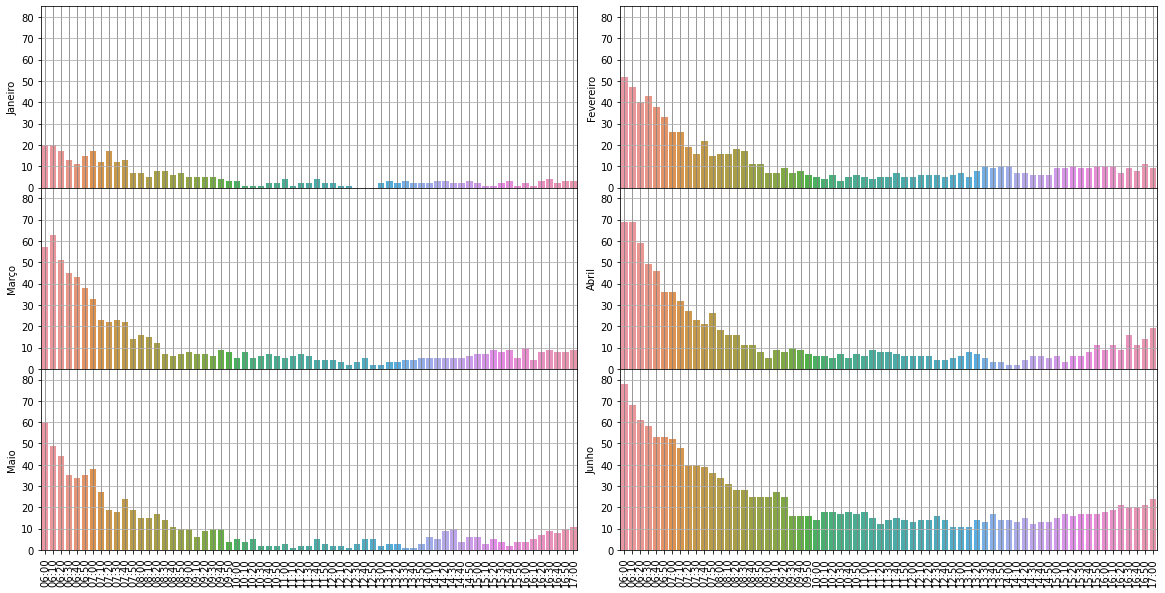

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10),sharex=True)
sns.barplot(ax=axes[0,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['jan2014','jan2015','jan2016','jan2017','jan2018','jan2019']].sum())
sns.barplot(ax=axes[0,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['fev2014','fev2015','fev2016','fev2017','fev2018','fev2019']].sum())
sns.barplot(ax=axes[1,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['mar2014','mar2015','mar2016','mar2017','mar2018','mar2019']].sum())
sns.barplot(ax=axes[1,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['abr2014','abr2015','abr2016','abr2017','abr2018','abr2019']].sum())
sns.barplot(ax=axes[2,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['mai2014','mai2015','mai2016','mai2017','mai2018','mai2019']].sum())
sns.barplot(ax=axes[2,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['jun2014','jun2015','jun2016','jun2017','jun2018','jun2019']].sum())
axes[0,0].set_ylabel('Janeiro')
axes[0,1].set_ylabel('Fevereiro')
axes[1,0].set_ylabel('Março')
axes[1,1].set_ylabel('Abril')
axes[2,0].set_ylabel('Maio')
axes[2,1].set_ylabel('Junho')
for i in range(3):
    for j in range(2):
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=90)
        axes[i,j].yaxis.grid()
        axes[i,j].xaxis.grid(color='grey')
        axes[i,j].set_ylim([0,85])
plt.subplots_adjust(wspace=0.08, hspace=0)


# $$ Total~De~Dados~Faltantes~Por~Mês $$

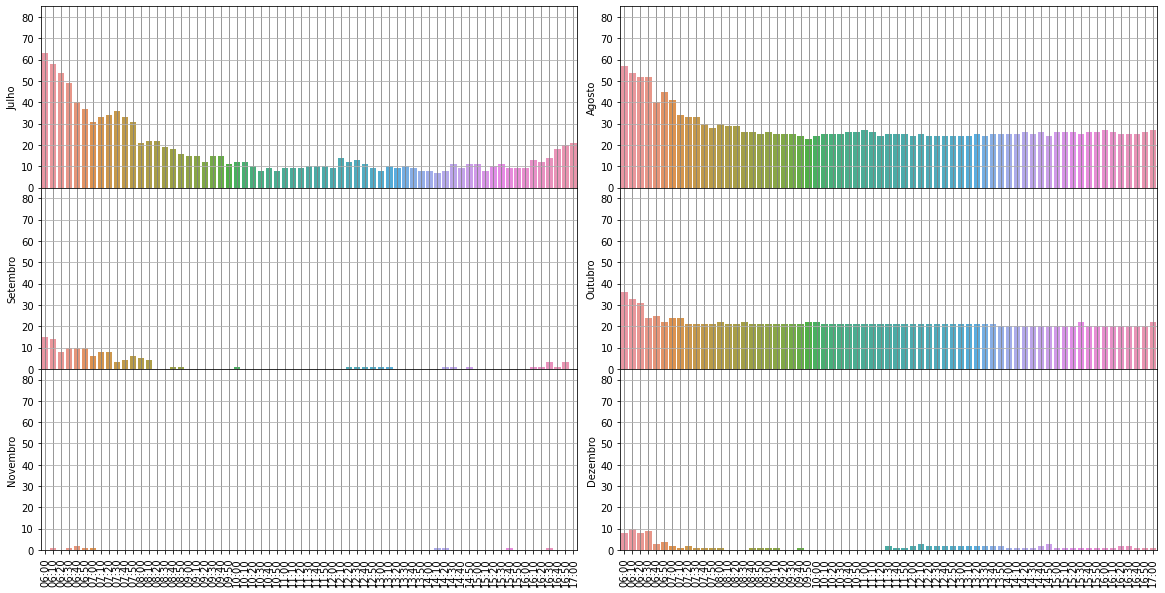

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10),sharex=True)
sns.barplot(ax=axes[0,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['jul2014','jul2015','jul2016','jul2017','jul2018','jul2019']].sum())
sns.barplot(ax=axes[0,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['ago2014','ago2015','ago2016','ago2017','ago2018','ago2019']].sum())
sns.barplot(ax=axes[1,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['set2014','set2015','set2016','set2018','set2019']].sum())
sns.barplot(ax=axes[1,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['out2014','out2015','out2016','out2017','out2018','out2019']].sum())
sns.barplot(ax=axes[2,0], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['nov2014','nov2015','nov2016','nov2017','nov2018','nov2019']].sum())
sns.barplot(ax=axes[2,1], x=tabelaHorariosFaltantes.columns, y=tabelaHorariosFaltantes.loc[['dez2014','dez2015','dez2016','dez2017','dez2018','dez2019']].sum())
axes[0,0].set_ylabel('Julho')
axes[0,1].set_ylabel('Agosto')
axes[1,0].set_ylabel('Setembro')
axes[1,1].set_ylabel('Outubro')
axes[2,0].set_ylabel('Novembro')
axes[2,1].set_ylabel('Dezembro')
for i in range(3):
    for j in range(2):
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=90)
        axes[i,j].yaxis.grid()
        axes[i,j].xaxis.grid(color='grey')
        axes[i,j].set_ylim([0,85])      
plt.subplots_adjust(wspace=0.08, hspace=0)

In [31]:
T = np.pi/180           
sind=lambda a:np.sin(T*a)           
cosd=lambda a:np.cos(T*a)           
tand=lambda a:np.tan(T*a)           
acosd=lambda a:(1/T)*np.arccos(a)   
asind=lambda a:(1/T)*np.arcsin(a)   
atand=lambda a:(1/T)*np.arctan(a)

In [32]:
N=np.arange(1,366)
np.shape(N)

(365,)

In [33]:
B = (N - 81)*360/364
np.shape(B)

(365,)

In [34]:
ET =9.87*sind(2*B)-7.53*cosd(B)-1.5*sind(B)
np.shape(ET)

(365,)

Text(0, 0.5, 'em minutos')

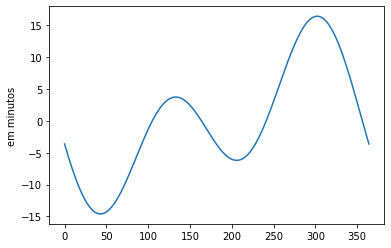

In [35]:
plt.plot(ET)
plt.ylabel('em minutos')

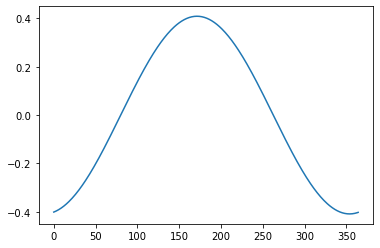

In [36]:
deltagraus =23.45*sind((360/365*(284 + N)))
deltarad=deltagraus*(np.pi/180)
plt.plot(deltarad)
plt.show()

In [37]:
HPL =np.arange(0,24*60,60)
HPL

array([   0,   60,  120,  180,  240,  300,  360,  420,  480,  540,  600,
        660,  720,  780,  840,  900,  960, 1020, 1080, 1140, 1200, 1260,
       1320, 1380])

In [38]:
HV = 0                                             # Horário de Verão (0 ou 60 minutos)
SL = 45                                            # Longitude Padrão Local
Long = 35.20298                                    # Longitude do Local (Natal-RN)
D = 1                                              # 0 para local a leste e 1 a oeste de Greenwich
TSA =  []   

for i in range(365):
        for j in range(24): 
            TSA.append(HPL[j] + ET[i] + 4*(SL - Long) - HV)

In [39]:
TSA=np.array(TSA)/60
pd.DataFrame(TSA).head(100)

,0
0,0.593020
1,1.593020
2,2.593020
3,3.593020
4,4.593020
5,5.593020
6,6.593020
7,7.593020
8,8.593020
9,9.593020


In [40]:
hhora = (HPL/60 - 12)*15
hhorarad = hhora*np.pi/180
hhorarad

array([-3.14159265, -2.87979327, -2.61799388, -2.35619449, -2.0943951 ,
       -1.83259571, -1.57079633, -1.30899694, -1.04719755, -0.78539816,
       -0.52359878, -0.26179939,  0.        ,  0.26179939,  0.52359878,
        0.78539816,  1.04719755,  1.30899694,  1.57079633,  1.83259571,
        2.0943951 ,  2.35619449,  2.61799388,  2.87979327])

In [41]:
#Calculo do zenite

L = -5.8487   #Latitude Local
alfa=[]
zenite=[]
for i in range(0,365):
    for j in range(24):
          alfa.append(asind(sind(L)*sind(deltagraus[i])+cosd(L)*cosd(hhora[j])*cosd(deltagraus[i]))) 

In [42]:
zenite=90-np.array(alfa)
zenite

array([151.13966327, 147.62903966, 138.86199268, ..., 127.38279558,
       138.81334909, 147.56390016])

In [43]:
Hss=acosd(-tand(L)*tand(deltagraus))
pd.DataFrame(Hss)

,0
0,92.493479
1,92.483670
2,92.473053
3,92.461634
4,92.449419
5,92.436416
6,92.422632
7,92.408074
8,92.392753
9,92.376675


In [44]:
#Radiação extraterrestre 
I_et=[]
Io=1367
for i in range(365*24):
    I_et.append(Io*(1+0.033*np.cos(np.deg2rad(360*i)/(365))*np.cos(np.deg2rad(zenite[i]))))    
    if I_et[i]<0:
        I_et.append(0)

In [114]:
#Integração de I_et horizontal
HoJ=(24*3600*Io/np.pi)*(1+0.033*cosd(360*N/365))*(cosd(L)*cosd(deltagraus)*sind(Hss)+(np.pi*Hss/180)*sind(L)*sind(deltagraus))
pd.DataFrame(HoJ)

,0
0,3.802298e+07
1,3.803543e+07
2,3.804853e+07
3,3.806225e+07
4,3.807656e+07
5,3.809143e+07
6,3.810684e+07
7,3.812275e+07
8,3.813913e+07
9,3.815594e+07


In [148]:
#Traformando em Watts*h/m²
HoW=HoJ/3600
pd.DataFrame(HoW)

,0
0,10561.938788
1,10565.398497
2,10569.036988
3,10572.847367
4,10576.822254
5,10580.953800
6,10585.233688
7,10589.653150
8,10594.202976
9,10598.873526


In [47]:
Fotoperíodo=0.1333*acosd(-tand(L)*tand(deltagraus))
foto=pd.DataFrame(Fotoperíodo)

In [48]:
jan2014ET=[];jan2015ET=[];jan2016ET=[];jan2017ET=[];jan2018ET=[];jan2019ET=[];
fev2014ET=[];fev2015ET=[];fev2016ET=[];fev2017ET=[];fev2018ET=[];fev2019ET=[];
mar2014ET=[];mar2015ET=[];mar2016ET=[];mar2017ET=[];mar2018ET=[];mar2019ET=[];
abr2014ET=[];abr2015ET=[];abr2016ET=[];abr2017ET=[];abr2018ET=[];abr2019ET=[];
mai2014ET=[];mai2015ET=[];mai2016ET=[];mai2017ET=[];mai2018ET=[];mai2019ET=[];
jun2014ET=[];jun2015ET=[];jun2016ET=[];jun2017ET=[];jun2018ET=[];jun2019ET=[];
jul2014ET=[];jul2015ET=[];jul2016ET=[];jul2017ET=[];jul2018ET=[];jul2019ET=[];
ago2014ET=[];ago2015ET=[];ago2016ET=[];ago2017ET=[];ago2018ET=[];ago2019ET=[];
set2014ET=[];set2015ET=[];set2016ET=[];set2017ET=[];set2018ET=[];set2019ET=[];
out2014ET=[];out2015ET=[];out2016ET=[];out2017ET=[];out2018ET=[];out2019ET=[];
nov2014ET=[];nov2015ET=[];nov2016ET=[];nov2017ET=[];nov2018ET=[];nov2019ET=[];
dez2014ET=[];dez2015ET=[];dez2016ET=[];dez2017ET=[];dez2018ET=[];dez2019ET=[];

In [49]:
for i in range(0,31):
    jan2014ET.append(HoW[i])
    jan2015ET.append(HoW[i])
    jan2016ET.append(HoW[i])
    jan2017ET.append(HoW[i])
    jan2018ET.append(HoW[i])
    jan2019ET.append(HoW[i])
    
for i in range(31,59):
    fev2014ET.append(HoW[i])
    fev2015ET.append(HoW[i])
    fev2016ET.append(HoW[i])
    fev2017ET.append(HoW[i])
    fev2018ET.append(HoW[i])
    fev2019ET.append(HoW[i])

    
for i in range(59,90):
    mar2014ET.append(HoW[i])
    mar2015ET.append(HoW[i])
    mar2016ET.append(HoW[i])
    mar2017ET.append(HoW[i])
    mar2018ET.append(HoW[i])
    mar2019ET.append(HoW[i])

for i in range(90,120):
    abr2014ET.append(HoW[i])
    abr2015ET.append(HoW[i])
    abr2016ET.append(HoW[i])
    abr2017ET.append(HoW[i])
    abr2018ET.append(HoW[i])
    abr2019ET.append(HoW[i])

for i in range(120,151):
    mai2014ET.append(HoW[i])
    mai2015ET.append(HoW[i])
    mai2016ET.append(HoW[i])
    mai2017ET.append(HoW[i])
    mai2018ET.append(HoW[i])
    mai2019ET.append(HoW[i])

for i in range(151,181):
    jun2014ET.append(HoW[i])
    jun2015ET.append(HoW[i])
    jun2016ET.append(HoW[i])
    jun2017ET.append(HoW[i])
    jun2018ET.append(HoW[i])
    jun2019ET.append(HoW[i])

for i in range(181,212):
    jul2014ET.append(HoW[i])
    jul2015ET.append(HoW[i])
    jul2016ET.append(HoW[i])
    jul2017ET.append(HoW[i])
    jul2018ET.append(HoW[i])
    jul2019ET.append(HoW[i])

for i in range(212,243):
    ago2014ET.append(HoW[i])
    ago2015ET.append(HoW[i])
    ago2016ET.append(HoW[i])
    ago2017ET.append(HoW[i])
    ago2018ET.append(HoW[i])
    ago2019ET.append(HoW[i])

for i in range(243,273):
    set2014ET.append(HoW[i])
    set2015ET.append(HoW[i])
    set2016ET.append(HoW[i])
    set2017ET.append(HoW[i])
    set2018ET.append(HoW[i])
    set2019ET.append(HoW[i])

for i in range(273,304):
    out2014ET.append(HoW[i])
    out2015ET.append(HoW[i])
    out2016ET.append(HoW[i])
    out2017ET.append(HoW[i])
    out2018ET.append(HoW[i])
    out2019ET.append(HoW[i])

for i in range(304,334):
    nov2014ET.append(HoW[i])
    nov2015ET.append(HoW[i])
    nov2016ET.append(HoW[i])
    nov2017ET.append(HoW[i])
    nov2018ET.append(HoW[i])
    nov2019ET.append(HoW[i])
for i in range(334,365):
    dez2014ET.append(HoW[i])
    dez2015ET.append(HoW[i])
    dez2016ET.append(HoW[i])
    dez2017ET.append(HoW[i])
    dez2018ET.append(HoW[i])
    dez2019ET.append(HoW[i])
    
fev2016ET.append(HoW[59])

In [50]:
tabelaHo3=pd.DataFrame([])

tabelaHo3['jan']=pd.Series([np.mean(jan2014ET),np.mean(jan2015ET),np.mean(jan2016ET),np.mean(jan2017ET),np.mean(jan2018ET),np.mean(jan2019ET)])
tabelaHo3['fev']=pd.Series([np.mean(fev2014ET),np.mean(fev2015ET),np.mean(fev2016ET),np.mean(fev2017ET),np.mean(fev2018ET),np.mean(fev2019ET)])
tabelaHo3['mar']=pd.Series([np.mean(mar2014ET),np.mean(mar2015ET),np.mean(mar2016ET),np.mean(mar2017ET),np.mean(mar2018ET),np.mean(mar2019ET)])
tabelaHo3['abr']=pd.Series([np.mean(abr2014ET),np.mean(abr2015ET),np.mean(abr2016ET),np.mean(abr2017ET),np.mean(abr2018ET),np.mean(abr2019ET)])
tabelaHo3['mai']=pd.Series([np.mean(mai2014ET),np.mean(mai2015ET),np.mean(mai2016ET),np.mean(mai2017ET),np.mean(mai2018ET),np.mean(mai2019ET)])
tabelaHo3['jun']=pd.Series([np.mean(jun2014ET),np.mean(jun2015ET),np.mean(jun2016ET),np.mean(jun2017ET),np.mean(jun2018ET),np.mean(jun2019ET)])
tabelaHo3['jul']=pd.Series([np.mean(jul2014ET),np.mean(jul2015ET),np.mean(jul2016ET),np.mean(jul2017ET),np.mean(jul2018ET),np.mean(jul2019ET)])
tabelaHo3['ago']=pd.Series([np.mean(ago2014ET),np.mean(ago2015ET),np.mean(ago2016ET),np.mean(ago2017ET),np.mean(ago2018ET),np.mean(ago2019ET)])
tabelaHo3['set']=pd.Series([np.mean(set2014ET),np.mean(set2015ET),np.mean(set2016ET),np.mean(set2017ET),np.mean(set2018ET),np.mean(set2019ET)])
tabelaHo3['out']=pd.Series([np.mean(out2014ET),np.mean(out2015ET),np.mean(out2016ET),np.mean(out2017ET),np.mean(out2018ET),np.mean(out2019ET)])
tabelaHo3['nov']=pd.Series([np.mean(nov2014ET),np.mean(nov2015ET),np.mean(nov2016ET),np.mean(nov2017ET),np.mean(nov2018ET),np.mean(nov2019ET)])
tabelaHo3['dez']=pd.Series([np.mean(dez2014ET),np.mean(dez2015ET),np.mean(dez2016ET),np.mean(dez2017ET),np.mean(dez2018ET),np.mean(dez2019ET)])

tabelaHo3.index = ['2014','2015','2016','2017','2018','2019']

In [51]:
tabelaHo3

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
2014,10630.388248,10728.880849,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
2015,10630.388248,10728.880849,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
2016,10630.388248,10727.894762,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
2017,10630.388248,10728.880849,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
2018,10630.388248,10728.880849,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
2019,10630.388248,10728.880849,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809


In [52]:
tabelaHo4 = pd.DataFrame([])

tabelaHo4['jan']=pd.Series(tabelaHo3.jan.mean())
tabelaHo4['fev']=pd.Series(tabelaHo3.fev.mean())
tabelaHo4['mar']=pd.Series(tabelaHo3.mar.mean())
tabelaHo4['abr']=pd.Series(tabelaHo3.abr.mean())
tabelaHo4['mai']=pd.Series(tabelaHo3.mai.mean())
tabelaHo4['jun']=pd.Series(tabelaHo3.jun.mean())
tabelaHo4['jul']=pd.Series(tabelaHo3.jul.mean())
tabelaHo4['ago']=pd.Series(tabelaHo3.ago.mean())
tabelaHo4['set']=pd.Series(tabelaHo3.set.mean())
tabelaHo4['out']=pd.Series(tabelaHo3.out.mean())
tabelaHo4['nov']=pd.Series(tabelaHo3.nov.mean())
tabelaHo4['dez']=pd.Series(tabelaHo3.dez.mean())

tabelaHo4.index = ["Ho"]

In [53]:
tabelaHo4  #Conferir os valores de Ho no sunearth

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
Ho,10630.388248,10728.716501,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809


In [54]:
KT = tabelaH.values/tabelaHo4.values
KT=pd.DataFrame(KT,columns=["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"])
KT.index = {"KT":0}
tabelaGeral2=pd.concat([tabelaH,tabelaHo4,KT])

In [55]:
tabelaGeral2

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
H,6355.479200,6234.103957,6193.458030,5693.604373,5410.573508,5167.911518,4991.350838,6062.339950,6473.904728,6864.935338,6990.760853,6500.350274
Ho,10630.388248,10728.716501,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809
KT,0.597860,0.581067,0.588521,0.576324,0.595573,0.598742,0.566710,0.638656,0.633512,0.647918,0.659204,0.616559


In [56]:
tabelaGeral2['méd']=[tabelaGeral2.loc['H'].mean(axis=0),tabelaGeral2.loc['Ho'].mean(axis=0),tabelaGeral2.loc['KT'].mean(axis=0)]
tabelaGeral2

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,méd
H,6355.479200,6234.103957,6193.458030,5693.604373,5410.573508,5167.911518,4991.350838,6062.339950,6473.904728,6864.935338,6990.760853,6500.350274,6078.231047
Ho,10630.388248,10728.716501,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809,9978.346887
KT,0.597860,0.581067,0.588521,0.576324,0.595573,0.598742,0.566710,0.638656,0.633512,0.647918,0.659204,0.616559,0.608387


In [57]:
tabelaGeral2['DP']=[np.std(tabelaGeral2.loc['H'],ddof=1),np.std(tabelaGeral2.loc['Ho'],ddof=1),np.std(tabelaGeral2.loc['KT'],ddof=1)]
tabelaGeral2

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,méd,DP
H,6355.479200,6234.103957,6193.458030,5693.604373,5410.573508,5167.911518,4991.350838,6062.339950,6473.904728,6864.935338,6990.760853,6500.350274,6078.231047,612.695124
Ho,10630.388248,10728.716501,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809,9978.346887,745.296251
KT,0.597860,0.581067,0.588521,0.576324,0.595573,0.598742,0.566710,0.638656,0.633512,0.647918,0.659204,0.616559,0.608387,0.028916


In [58]:
tabelaGeral2['Coef. de Variação (%)']=pd.DataFrame([612.695124*100/6078.231047,745.296251*100/9978.346887,0.028916*100/0.608387], index=['H','Ho','KT'])
tabelaGeral2

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,méd,DP,Coef. de Variação (%)
H,6355.479200,6234.103957,6193.458030,5693.604373,5410.573508,5167.911518,4991.350838,6062.339950,6473.904728,6864.935338,6990.760853,6500.350274,6078.231047,612.695124,10.080155
Ho,10630.388248,10728.716501,10523.762556,9879.166822,9084.654777,8631.285974,8807.596916,9492.342427,10219.074089,10595.372841,10604.857679,10542.943809,9978.346887,745.296251,7.469136
KT,0.597860,0.581067,0.588521,0.576324,0.595573,0.598742,0.566710,0.638656,0.633512,0.647918,0.659204,0.616559,0.608387,0.028916,4.752896


In [59]:
tabelaGeral2.to_excel(r'C:\Users\Katia Suely\Desktop\Tabela de KT.xlsx')

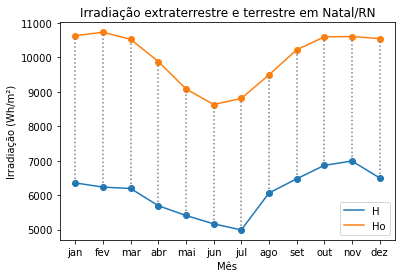

In [60]:
plt.plot(tabelaGeral2.loc['H','jan':'dez'])
plt.scatter(x=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'],y=tabelaGeral2.loc['H','jan':'dez'])
plt.plot(tabelaGeral2.loc['Ho','jan':'dez'])
plt.scatter(x=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'],y=tabelaGeral2.loc['Ho','jan':'dez'])
plt.vlines(x=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'],ymin=tabelaGeral2.loc['H','jan':'dez'],ymax=tabelaGeral2.loc['Ho','jan':'dez'],color='gray',linestyles='dotted')
plt.xlabel('Mês')
plt.ylabel('Irradiação (Wh/m²)')
plt.legend(['H','Ho'],loc='lower right')
plt.title('Irradiação extraterrestre e terrestre em Natal/RN')
plt.show()


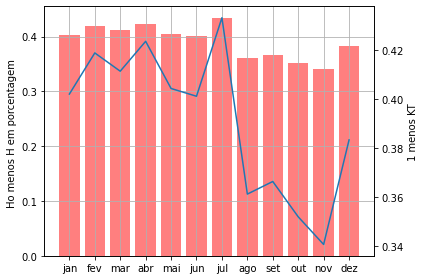

In [61]:
#pd.Dataframe(tabelaGeral2.loc['kt'])
langs = ["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"]
students = tabelaGeral2.loc['Ho','jan':'dez']-tabelaGeral2.loc['H','jan':'dez']
#plt.plot(langs,students)
fig,ax1 = plt.subplots()
ax1.bar(langs,students/tabelaGeral2.loc['Ho','jan':'dez'],ls='dashed', alpha = 0.5, lw=7,color='red')
plt.ylabel('Ho menos H em porcentagem ')
ax2 = ax1.twinx()
ax2.plot(langs,1-tabelaGeral2.loc['KT','jan':'dez'])
plt.ylabel('1 menos KT')
fig.tight_layout()
ax1.grid()
plt.show()

In [62]:
students/tabelaGeral2.loc['Ho','jan':'dez']

jan    0.402140
fev    0.418933
mar    0.411479
abr    0.423676
mai    0.404427
jun    0.401258
jul    0.433290
ago    0.361344
set    0.366488
out    0.352082
nov    0.340796
dez    0.383441
dtype: float64

In [63]:
students


jan    4274.909048
fev    4494.612544
mar    4330.304526
abr    4185.562449
mai    3674.081268
jun    3463.374456
jul    3816.246078
ago    3430.002477
set    3745.169361
out    3730.437503
nov    3614.096826
dez    4042.593535
dtype: float64

In [64]:
df1 = pd.DataFrame({"Mês": ["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"],
                   "Radiação média mensal": tabelaGeral2.loc['H','jan':'dez'],
                   "Radiação média mensal ET":tabelaGeral2.loc['Ho','jan':'dez'],
                   "kt": tabelaGeral2.loc['kt','jan':'dez']})



KeyError: 'kt'

In [ ]:
students = [(tabelaGeral2.loc['Ho','jan':'dez'])-(tabelaGeral2.loc['H','jan':'dez'])]
students 

In [ ]:
df.loc['201','Rain'].mean()

# $$ Total~De~Dados~Faltantes~Por~Mês $$

In [ ]:
vet.FilledData.loc[(vet.FilledData=='Faltante')].groupby([vet.FilledData.loc[(vet.FilledData=='Faltante')].index.strftime('%H:%M')]).count()